<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Практический анализ данных и машинное обучение"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: старший преподаватель Факультета Компьютерных Наук ВШЭ, программист-исследователь Mail.ru Group  Юрий Кашницкий
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Занятие 4. Обучение с учителем. Методы классификации
## <center>Практика. Переобучение, кривые валидации и обучения

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
%pylab inline
figsize(12, 8)
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import StandardScaler
import sys
sys.path.append('../../scripts/')
from load_titanic_with_features import load_titanic

Populating the interactive namespace from numpy and matplotlib


In [2]:
X_train, y, X_test, = load_titanic("../../data/titanic_train.csv",
                                       "../../data/titanic_test.csv")


In [3]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title,FamilyId
0,3,0,22.0,7.2500,0,1,1,-1
1,1,1,38.0,71.2833,1,1,3,-1
2,3,1,26.0,7.9250,0,0,2,-1
3,1,1,35.0,53.1000,0,1,3,-1
4,3,0,35.0,8.0500,0,0,1,-1


**Отшкалируйте выборку - создайте X_train_scaled и X_test_scaled.**

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
def plot_curve(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)

In [26]:
def plot_learning_curve(C=1):
    train_sizes = np.linspace(0.05, 1, 20)
    N_train, val_train, val_test = learning_curve(SVC(C=C),
                                                  X_train_scaled, y, train_sizes = train_sizes, cv=5)
    plot_curve(N_train, 1 - val_train, label='training scores')
    plot_curve(N_train, 1 - val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('error')
    plt.ylim(0, 0.4)
    plt.xlim(5, 800)
    plt.legend()

In [7]:
validation_curve?

**Посмотрите, как использовать метод validation_curve и получите значения качества при 5-кратной кросс-валидации с SVM на обучающей и тестовой выборках для 100 значений параметра C от $10^{-3}$ до $10^2$.**

In [33]:
c_values = np.logspace(-3, 2, 100)

val_train, val_test = validation_curve(SVC(), X_train_scaled, y, param_name='C',
                                       param_range = c_values, cv=5,
                                       scoring='accuracy')

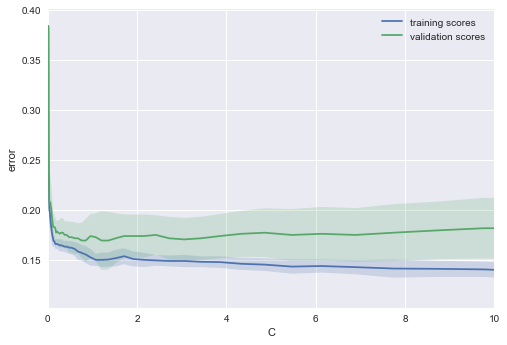

In [34]:
plot_curve(c_values, 1 - val_train, label='training scores')
plot_curve(c_values, 1 - val_test, label='validation scores')
plt.xlabel('C'); plt.ylabel('error')
plt.legend();
plt.xlim(0,10);

**Теперь то же самое, но для 100 значений C от 0.05 до 5. Проделайте это для масштабированной и не масштабированной выборки и сравните результаты.**

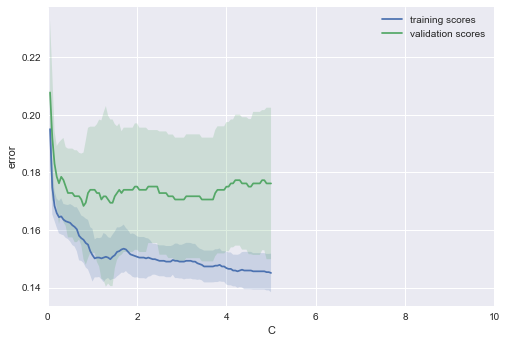

In [35]:
c_values = np.linspace(0.05, 5, 100)
val_train, val_test = validation_curve(SVC(), X_train_scaled, y, param_name='C',
                                       param_range = c_values, cv=5,
                                       scoring='accuracy')
plot_curve(c_values, 1 - val_train, label='training scores')
plot_curve(c_values, 1 - val_test, label='validation scores')
plt.xlabel('C'); plt.ylabel('error')
plt.legend();
plt.xlim(0,10);

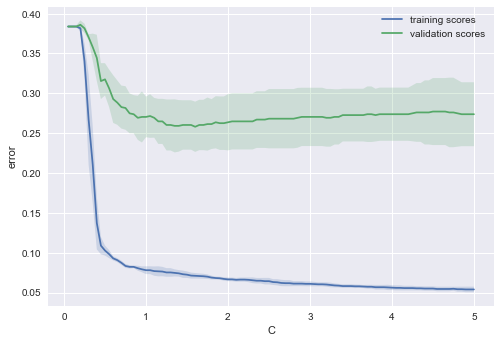

In [36]:
c_values = np.linspace(0.05, 5, 100)
val_train, val_test = validation_curve(SVC(), X_train, y, param_name='C',
                                       param_range = c_values, cv=5,
                                       scoring='accuracy')
plot_curve(c_values, 1 - val_train, label='training scores')
plot_curve(c_values, 1 - val_test, label='validation scores')
plt.xlabel('C'); plt.ylabel('error')
plt.legend();

**Найдите оптимальное значение параметра регуляризации C из диапазона от 0.05 до 3 с помощью GridSearchCV.**

In [23]:
from sklearn.grid_search import GridSearchCV

params = {'C': np.linspace(0.05, 3, 100)}

best_clf = GridSearchCV(SVC(), params, cv=5, n_jobs = -1, verbose=1)

best_clf.fit(X_train_scaled, y)

# print best estimatior and params
print("Best params:", best_clf.best_params_)
print("Best cross validation accuracy", best_clf.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  43 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 493 out of 500 | elapsed:   31.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   31.9s finished


Best params: {'C': 0.76515151515151525}
Best cross validation accuracy 0.8316498316498316


**Посмотрите на кривые обучения для значений $C\ 10^{-4}, 10^4$, а также для лучшего найденного с помощью GridSearchCV. Проинтерпретируйте полученные результаты.**

Wall time: 2.21 s


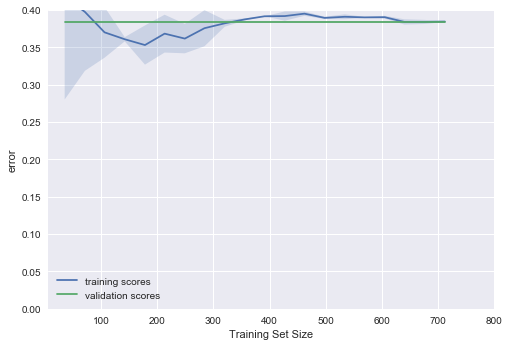

In [27]:
%%time
plot_learning_curve(1e-4)

Wall time: 1.87 s


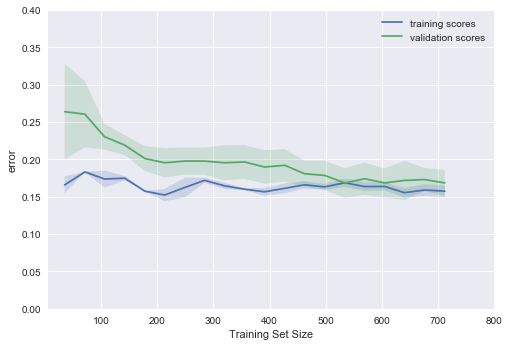

In [28]:
%%time
plot_learning_curve(best_clf.best_params_['C'])

Wall time: 1min 44s


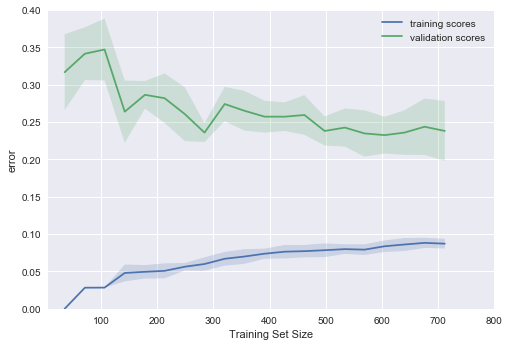

In [29]:
%%time
plot_learning_curve(1e4)

**Запишем ответы в файл и отправим решение на Kaggle.**

In [30]:
# make predictions. This results in 0.7847 LB
predicted_labels = best_clf.predict(X_test_scaled)

# turn predictions into data frame and save as csv file
predicted_df = pd.DataFrame(predicted_labels,
                            index = np.arange(892, 892 + X_test_scaled.shape[0]),
                            columns=["Survived"])
predicted_df.to_csv("../../output/titanic_simple_svm.csv", index_label="PassengerId")